<a href="https://colab.research.google.com/github/FernandoBRdgz/diplomado_ds_mod4/blob/main/4.3%20Redes%20Neuronales%20Convolucionales/4.3.3%20Clasificaci%C3%B3n%20de%20im%C3%A1genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_val, y_val) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [ ]:
X_train[0].shape

(32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt

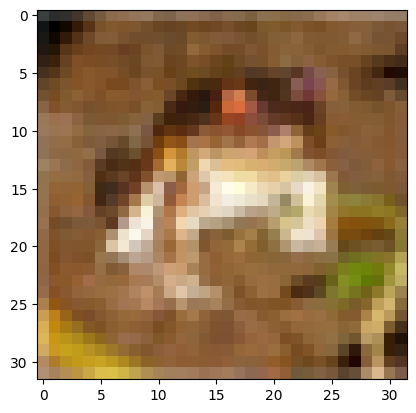

In [ ]:
# Rana
plt.imshow(X_train[0]);

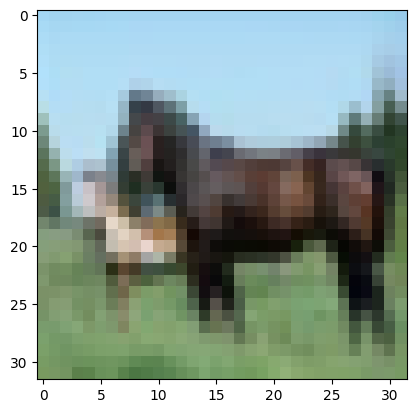

In [ ]:
# Caballo
plt.imshow(X_train[12]);

# Pre-procesamiento

In [ ]:
type(X_train[0])

numpy.ndarray

In [ ]:
X_train[0].shape

(32, 32, 3)

In [ ]:
X_train.min(), X_train.max()

(0, 255)

In [ ]:
X_train = X_train/255

In [ ]:
X_val = X_val/255

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_val.shape

(10000, 32, 32, 3)

## Variable Objetivo

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [ ]:
y_cat_train.shape

(50000, 10)

In [ ]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_val = to_categorical(y_val, num_classes=10)

# Diseño de arquitectura

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=32, kernel_size=4, strides=1, padding='same', input_shape=(32, 32, 3), activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2,2), strides=2))

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=32, kernel_size=4, padding='valid', activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# CAPA FLATTEN (Aplanado de imágenes)
model.add(Flatten())

# CAPA OCULTA DENSA
model.add(Dense(256, activation='relu'))

# CAPA DE SALIDA (10 clases posibles)
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 256)               2

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Entenamiento de Modelo

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

In [ ]:
%%time
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_val, y_cat_val), callbacks=[early_stop])

Epoch 1/10
1563/1563 [==============================] - 20s 5ms/step - loss: 1.4400 - accuracy: 0.4803 - val_loss: 1.2408 - val_accuracy: 0.5701
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0905 - accuracy: 0.6156 - val_loss: 1.0744 - val_accuracy: 0.6231
Epoch 3/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9353 - accuracy: 0.6722 - val_loss: 0.9662 - val_accuracy: 0.6608
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8170 - accuracy: 0.7141 - val_loss: 0.9032 - val_accuracy: 0.6907
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7214 - accuracy: 0.7485 - val_loss: 0.9174 - val_accuracy: 0.6871
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6354 - accuracy: 0.7780 - val_loss: 0.9157 - val_accuracy: 0.6981
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5614 - accuracy: 0.8025 - val_loss: 0.9482 - val_accuracy

In [ ]:
# Persistencia de modelo
model.save('cifar_10epochs.h5')

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,accuracy,val_loss,val_accuracy
0,1.440039,0.48032,1.240781,0.5701
1,1.090499,0.61560,1.074408,0.6231
2,0.935326,0.67216,0.966188,0.6608
3,0.817004,0.71406,0.903192,0.6907
4,0.721388,0.74850,0.917368,0.6871
5,0.635360,0.77798,0.915717,0.6981
6,0.561445,0.80248,0.948172,0.6925


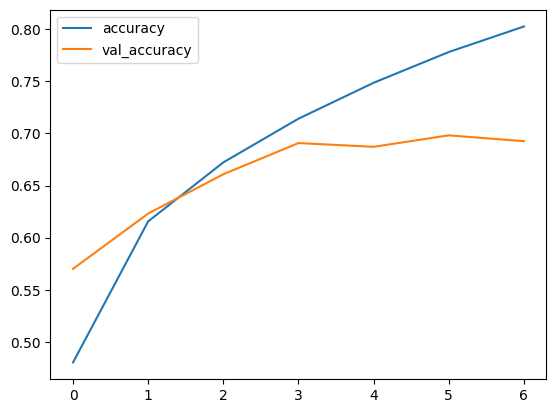

In [ ]:
losses[['accuracy','val_accuracy']].plot();

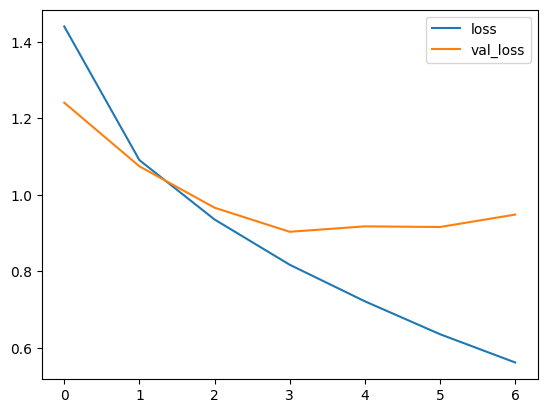

In [ ]:
losses[['loss','val_loss']].plot();

In [ ]:
print(model.metrics_names)
print(model.evaluate(X_val, y_cat_val, verbose=0))

['loss', 'accuracy']
[0.9481721520423889, 0.6924999952316284]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model.predict(X_val)
predictions = np.argmax(predictions, axis=1).reshape(len(X_val), 1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_val.shape, predictions.shape

((10000, 1), (10000, 1))

In [ ]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72      1000
           1       0.77      0.89      0.82      1000
           2       0.62      0.53      0.57      1000
           3       0.52      0.48      0.50      1000
           4       0.67      0.58      0.62      1000
           5       0.56      0.61      0.58      1000
           6       0.72      0.82      0.77      1000
           7       0.75      0.73      0.74      1000
           8       0.76      0.83      0.80      1000
           9       0.79      0.76      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [ ]:
confusion_matrix(y_val, predictions)

array([[705,  41,  34,  21,  17,   9,  17,  11, 105,  40],
       [ 13, 886,   4,   9,   0,   3,  11,   5,  26,  43],
       [ 60,  14, 530,  70,  87,  78,  78,  40,  28,  15],
       [ 23,  13,  70, 482,  46, 198,  77,  42,  23,  26],
       [ 30,  10,  74,  71, 577,  58,  77,  74,  21,   8],
       [ 16,   7,  54, 163,  43, 609,  34,  52,  11,  11],
       [  6,   8,  34,  56,  19,  38, 818,   6,   8,   7],
       [ 17,   6,  31,  35,  64,  77,   9, 728,  11,  22],
       [ 55,  43,  11,  11,   2,   7,   8,   3, 835,  25],
       [ 36, 122,   9,  13,   3,  13,   7,  12,  30, 755]])

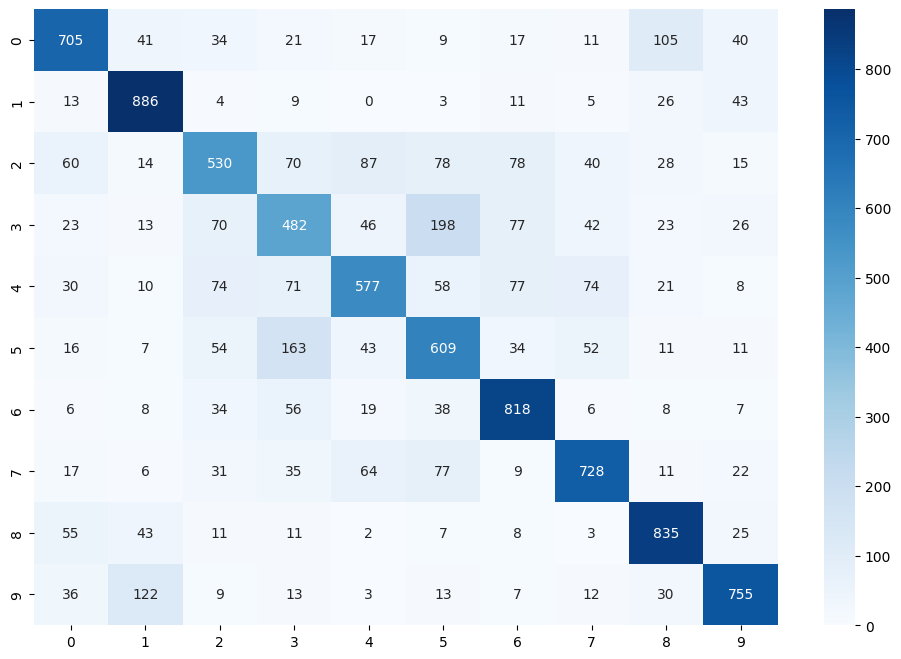

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_val, predictions), annot=True, cmap="Blues", fmt=".3g");

# Predicciones

In [ ]:
my_image = X_val[123]

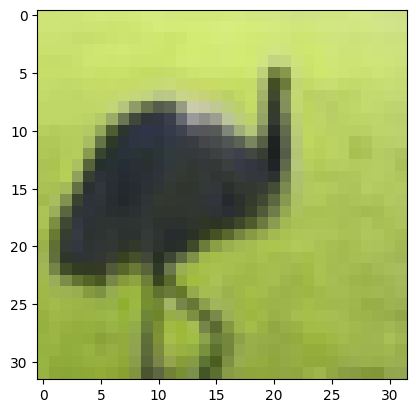

In [ ]:
plt.imshow(my_image);

In [ ]:
my_image.shape

(32, 32, 3)

In [ ]:
# Dimensiones --> (catidad de imágenes, ancho, alto, canales)
np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))

1/1 [==============================] - 0s 18ms/step


2